In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Implementing_K_Nearest_Neighbors_(KNN)_train.txt', sep=",", header=None, dtype='int64')
arr = df.values

In [16]:
df2 = pd.read_csv('Implementing_K_Nearest_Neighbors_(KNN)_test.txt', sep=",", header=None, dtype='int64')
test = df2.values

In [17]:
w1x = []
w1y = []
w2x = []
w2y = []

In [18]:
for i in range(len(arr)):

    if arr[i][2] == 1:
        w1x.append(arr[i][0])
        w1y.append(arr[i][1])
    else:
        w2x.append(arr[i][0])
        w2y.append(arr[i][1])


In [34]:
list_f = np.empty((0, 4), int)

In [35]:
for i in range(len(test)):
    list2 = []
    class_1 = []

    for j in range(len(arr)):
            val1 = np.power((test[i][0] - arr[j][0]), 2)
            val2 = np.power((test[i][1] - arr[j][1]), 2)
            distance = np.sqrt(val1 + val2)
            list2.append(distance)
            class_1.append(arr[j][2])
    list_f = np.append(list_f, np.array([[test[i][0], test[i][1], list2, class_1]]), 0)
#print(list_f)

[[3 7
  list([4.0, 5.0, 4.242640687119285, 4.47213595499958, 4.123105625617661, 3.0, 3.1622776601683795, 3.0, 4.123105625617661, 5.0, 4.123105625617661, 4.0, 3.1622776601683795, 3.605551275463989])
  list([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])]
 [7 7
  list([0.0, 3.0, 3.1622776601683795, 2.0, 1.0, 1.0, 1.4142135623730951, 5.0, 6.4031242374328485, 6.4031242374328485, 5.0, 5.656854249492381, 4.242640687119285, 6.708203932499369])
  list([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])]
 [4 3
  list([5.0, 3.1622776601683795, 2.23606797749979, 3.605551275463989, 4.242640687119285, 4.47213595499958, 3.605551275463989, 1.4142135623730951, 2.0, 1.4142135623730951, 0.0, 1.0, 1.0, 3.1622776601683795])
  list([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2])]
 [2 8
  list([5.0990195135927845, 6.4031242374328485, 5.656854249492381, 5.830951894845301, 5.385164807134504, 4.123105625617661, 4.47213595499958, 4.123105625617661, 5.0, 6.082762530298219, 5.385164807134504, 5.0990195135927845, 4.47213595499958

<ipython-input-35-483f07092cab>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_f = np.append(list_f, np.array([[test[i][0], test[i][1], list2, class_1]]), 0)


In [21]:
predicted_list = []
k = int(input("Value of K: "))

Value of K: 3


In [22]:
def sort(arr, arr2):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                arr2[j], arr2[j+1] = arr2[j+1], arr2[j]


In [23]:
list_f2 = np.empty((0, 3), int)

for i in range(len(list_f)):
    sort(list_f[i][2], list_f[i][3])
    sort_dis = list_f[i][2]
    sort_class = list_f[i][3]
    c1, c2 = 0, 0

    for j in range(k):
        if sort_class[j] == 1:
            c1 = c1+1
        else:
            c2 = c2+1

    if c1 > c2:
        list_f2 = np.append(list_f2, np.array([[list_f[i][0], list_f[i][1], 1]]), 0)
        predicted_list.append(1)
    else:
        list_f2 = np.append(list_f2, np.array([[list_f[i][0], list_f[i][1], 2]]), 0)
        predicted_list.append(2)


In [24]:

f = open("prediction.txt", "w")

for i in range(len(list_f)):
    f.write("Test point: %d, %d\n" % (list_f[i][0], list_f[i][1]))
    dis = list_f[i][2]
    cls = list_f[i][3]

    for j in range(k):
        f.write("Distance %d: %f \t Class: %d \n" % ((j+1), dis[j], cls[j]))
    f.write("Predicted class:%d \n\n" % (predicted_list[i]))

f.close()

In [25]:
w1x_new = []
w1y_new = []
w2x_new = []
w2y_new = []

for i in range(len(list_f2)):
    if list_f2[i][2] == 1:
        w1x_new.append(list_f2[i][0])
        w1y_new.append(list_f2[i][1])
    elif list_f2[i][2] == 2:
        w2x_new.append(list_f2[i][0])
        w2y_new.append(list_f2[i][1])


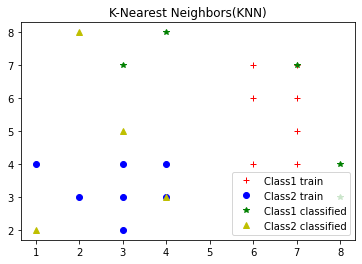

In [26]:
plt.plot(w1x, w1y, '+r', label='Class1 train')
plt.plot(w2x, w2y, 'ob', label='Class2 train')
plt.plot(w1x_new, w1y_new, '*g', label='Class1 classified')
plt.plot(w2x_new, w2y_new, '^y', label='Class2 classified')

plt.title('K-Nearest Neighbors(KNN)')
plt.legend()
plt.show()
